In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Task 2-1

In [149]:
def vector_lenght(vector):
    res = 0
    for i in vector:
        res += i**2
    return res**0.5

In [150]:
x = np.array([2,2,1])

In [151]:
vector_lenght(x)

3.0

Task 2-3

In [152]:
def circle(x1, y1, r):
    x = np.linspace(2*(x1-r-1), 2*(r+x1+1), 400)
    y = np.linspace(2*(y1-r-1), 2*(r+y1+1), 400)
    x, y = np.meshgrid(x,y)
    plt.figure(figsize=(7,7))
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    plt.contour(x, y, ((x-x1)**2 + (y-y1)**2), [r**0.5])
    plt.show()

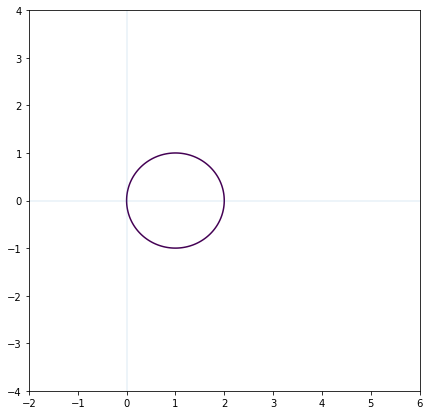

In [153]:
circle(1,0,1)

In [154]:
def ellipse(x1,y1,a,b):
    x = np.linspace(2*(x1-a-1), 2*(a+x1+1), 400)
    y = np.linspace(2*(y1-b-1), 2*(b+y1+1), 400)
    x, y = np.meshgrid(x,y)
    plt.figure(figsize=(7,7))
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    plt.contour(x, y, ((x-x1)**2/a**2 + (y-y1)**2/b**2), [1])
    plt.show()

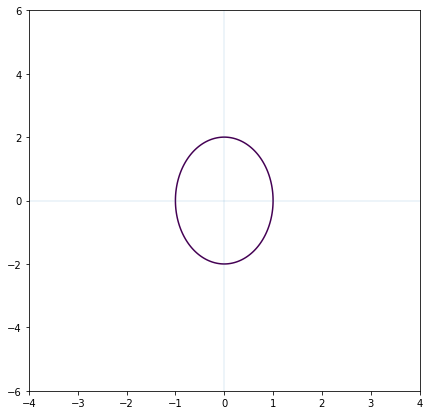

In [155]:
ellipse(0,0,1,2)

In [156]:
def hyper(a,b):
    x = np.linspace(-a-10, a+10, 400)
    y = np.linspace(-b/a*(a+10), b/a*(a+10), 400)
    x, y = np.meshgrid(x,y)
    plt.figure(figsize=(7,7))
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    plt.contour(x, y, (x**2/a**2 - y**2/b**2), [1])
    plt.show()

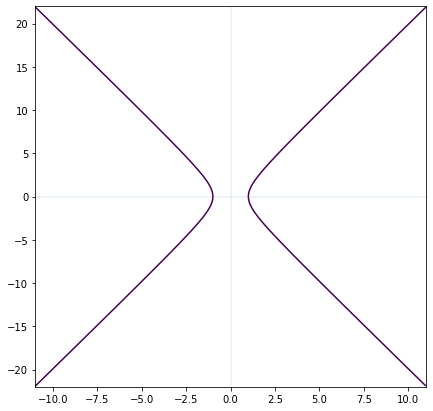

In [157]:
hyper(1,2)

Task 2-5

In [158]:
from mpl_toolkits.mplot3d import axes3d

In [159]:
x = np.linspace(-5,5,400)
y = np.linspace(-5,5,400)
X, Y = np.meshgrid(x, y)

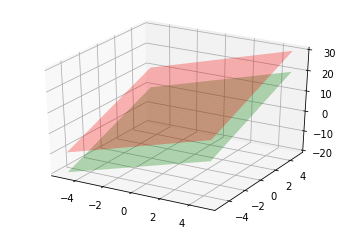

In [160]:
ax = plt.figure().gca(projection='3d')
ax.plot_surface(X, Y, (2*X + 2*Y), alpha=0.3, color='g')
ax.plot_surface(X, Y, (2*X + 2*Y+10), alpha=0.3, color='r')
plt.show()

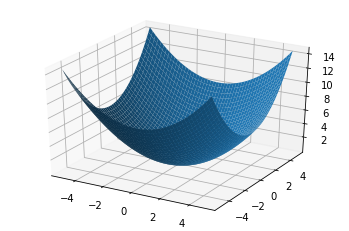

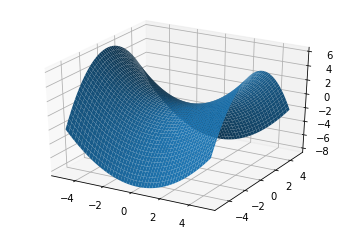

In [161]:
ax1 = plt.figure().gca(projection='3d')
ax2 = plt.figure().gca(projection='3d')

ax1.plot_surface(X, Y, (X**2/4 + Y**2/3))
ax2.plot_surface(X, Y, (X**2/4 - Y**2/3))
plt.show()

Task 3-1

In [162]:
def f(k, a, b, x):
    return k*np.cos(x-a)+b

In [163]:
x = np.linspace(-2*np.pi,2*np.pi, 400)
y1 = f(1, 0, 2, x)
y2 = f(2, 1, 0, x)
y3 = f(1.5, 2, 1, x)

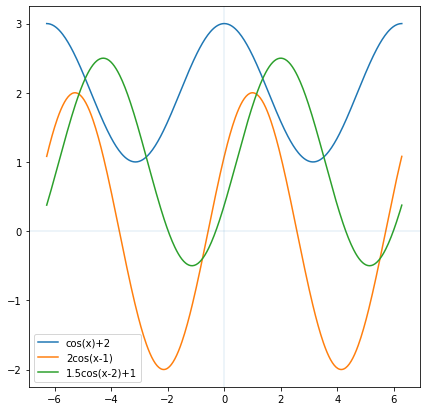

In [164]:
plt.figure(figsize=(7,7))
plt.plot(x, y1, label='cos(x)+2')
plt.plot(x, y2, label='2cos(x-1)')
plt.plot(x, y3, label='1.5cos(x-2)+1')
plt.axhline(0, alpha=.1)
plt.axvline(0, alpha=.1)
plt.legend()
plt.show()

Task 3-3

In [165]:
def polar_to_decart(angle, radius):
    try:
        assert radius >= 0
        assert angle <= 2*np.pi
        assert angle >= 0
    except AssertionError:
        print('Wrong value of angle or radius.')
    decart = np.array([np.around(radius*np.cos(angle), decimals=2), np.around(radius*np.sin(angle), decimals=2)])   
    return decart

In [166]:
print(polar_to_decart(np.pi/2, 1))

[0. 1.]


In [208]:
def circle_in_polar(radius):
    try:
        assert radius >= 0
    except AssertionError:
        print('Wrong value of radius.')
    x = np.linspace(0, 2*np.pi, 400)
    y = np.array([radius for i in range(400)])
    ax = plt.subplot(111, projection='polar')
    ax.plot(x, y)
    ax.set_rmax(radius+0.5)

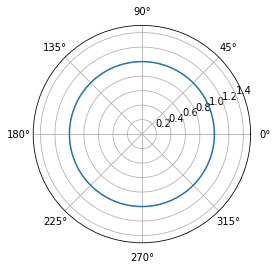

In [209]:
circle_in_polar(1)

In [213]:
def line_in_polar(angle, radius):
    try:
        assert radius >= 0
        assert angle <= 2*np.pi
        assert angle >= 0
    except AssertionError:
        print('Wrong value of angle or radius.')
    x = np.array([angle for i in range(400)])
    y = np.linspace(0, radius, 400)
    ax = plt.subplot(111, projection='polar')
    ax.plot(x, y)
    ax.set_rmax(radius+0.5)

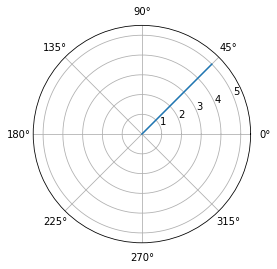

In [214]:
line_in_polar(np.pi/4, 5)

Task 3-4

In [215]:
from scipy.optimize import fsolve

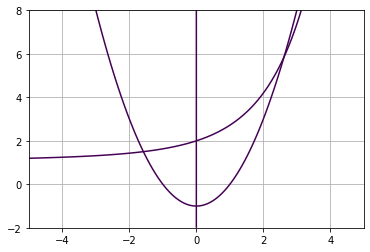

In [222]:
x = np.linspace(-5,5, 400)
y = np.linspace(-2,8, 400)
X, Y = np.meshgrid(x,y)
plt.contour(X, Y, (Y - X**2 +1), [0])
plt.contour(X, Y, (np.exp(X) + X*(1-Y)), [1])
plt.grid()

In [226]:
def eq(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x*(1-y)-1)

In [233]:
x1, y1 = fsolve(eq,(1,1))
print('{:.2f} {:.2f}'.format(x1, y1))

0.00 -1.00


In [234]:
x1, y1 = fsolve(eq,(2,1))
print('{:.2f} {:.2f}'.format(x1, y1))

2.62 5.85


In [235]:
x1, y1 = fsolve(eq,(-2,1))
print('{:.2f} {:.2f}'.format(x1, y1))

-1.58 1.50


Для решения задачи с неравенством, достаточно подставить в неравенство y=x^2-1 и найти все значения x для которых уравнение e^x + x^3 - 1 принимает положительные значения.

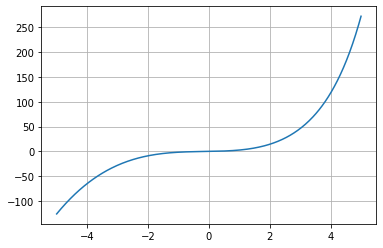

In [239]:
x = np.linspace(-5,5, 400)
y = np.exp(x) + x**3-1
plt.plot(x,y)
plt.grid()

уже из графика видно, что при х>0 функция приниимает только положительные значения. Таким образом решением уравнения с неравенством является система x>0 и y = x^2-1.